In [12]:
IPython.display("notMNIST_large/A/SXJvY2hlc3Rlci1MaWdodC5vdGY=.png")

NameError: name 'IPython' is not defined

In [16]:
from IPython.display import Image

In [21]:
Image("./notMNIST_large/A/SXJvY2hlc3Rlci1MaWdodC5vdGY=.png")

In [25]:
Image("./notMNIST_large/A/SXJpc1VQQyBJdGFsaWMudHRm.png")

In [26]:
Image("notMNIST_large/A/eS5uLncudS5hLnkudHRm.png")

In [1]:
Image("notMNIST_large/A/eS5uLncudS5hLnkudHRm.png")

NameError: name 'Image' is not defined

In [2]:
from IPython.display import Image

In [3]:
Image("notMNIST_large/A/eS5uLncudS5hLnkudHRm.png")

In [4]:
matplotlib.pyplot

NameError: name 'matplotlib' is not defined

In [5]:
plt

NameError: name 'plt' is not defined

In [6]:
matplotlib.pyplot

NameError: name 'matplotlib' is not defined

In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [8]:
plt

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [11]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [2]:
url = 'https://commondatastorage.googleapis.com/books1000/'
last_percent_reported = None
data_root = '.' # Change me to store data elsewhere

def download_progress_hook(count, blockSize, totalSize):
  """A hook to report the progress of a download. This is mostly intended for users with
  slow internet connections. Reports every 5% change in download progress.
  """
  global last_percent_reported
  percent = int(count * blockSize * 100 / totalSize)

  if last_percent_reported != percent:
    if percent % 5 == 0:
      sys.stdout.write("%s%%" % percent)
      sys.stdout.flush()
    else:
      sys.stdout.write(".")
      sys.stdout.flush()
      
    last_percent_reported = percent
        
def maybe_download(filename, expected_bytes, force=False):
  """Download a file if not present, and make sure it's the right size."""
  dest_filename = os.path.join(data_root, filename)
  if force or not os.path.exists(dest_filename):
    print('Attempting to download:', filename) 
    filename, _ = urlretrieve(url + filename, dest_filename, reporthook=download_progress_hook)
    print('\nDownload Complete!')
  statinfo = os.stat(dest_filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified', dest_filename)
  else:
    raise Exception(
      'Failed to verify ' + dest_filename + '. Can you get to it with a browser?')
  return dest_filename

train_filename = maybe_download('notMNIST_large.tar.gz', 247336696)
test_filename = maybe_download('notMNIST_small.tar.gz', 8458043)

Attempting to download: notMNIST_large.tar.gz
0%....5%....10%....15%....20%....25%....30%....35%....40%....45%....50%....55%....60%....65%....70%....75%....80%....85%....90%....95%....100%
Download Complete!
Found and verified ./notMNIST_large.tar.gz
Attempting to download: notMNIST_small.tar.gz
0%....5%....10%....15%....20%....25%....30%....35%....40%....45%....50%....55%....60%....65%....70%....75%....80%....85%....90%....95%....100%
Download Complete!
Found and verified ./notMNIST_small.tar.gz


In [4]:
num_classes = 10
np.random.seed(133)

def maybe_extract(filename, force=False):
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
  if os.path.isdir(root) and not force:
    # You may override by setting force=True.
    print('%s already present - Skipping extraction of %s.' % (root, filename))
  else:
    print('Extracting data for %s. This may take a while. Please wait.' % root)
    tar = tarfile.open(filename)
    sys.stdout.flush()
    tar.extractall(data_root)
    tar.close()
  data_folders = [
    os.path.join(root, d) for d in sorted(os.listdir(root))
    if os.path.isdir(os.path.join(root, d))]
  if len(data_folders) != num_classes:
    raise Exception(
      'Expected %d folders, one per class. Found %d instead.' % (
        num_classes, len(data_folders)))
  print(data_folders)
  return data_folders
  
train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)

./notMNIST_large already present - Skipping extraction of ./notMNIST_large.tar.gz.
['./notMNIST_large/A', './notMNIST_large/B', './notMNIST_large/C', './notMNIST_large/D', './notMNIST_large/E', './notMNIST_large/F', './notMNIST_large/G', './notMNIST_large/H', './notMNIST_large/I', './notMNIST_large/J']
./notMNIST_small already present - Skipping extraction of ./notMNIST_small.tar.gz.
['./notMNIST_small/A', './notMNIST_small/B', './notMNIST_small/C', './notMNIST_small/D', './notMNIST_small/E', './notMNIST_small/F', './notMNIST_small/G', './notMNIST_small/H', './notMNIST_small/I', './notMNIST_small/J']


In [8]:
print(train_folders)

['./notMNIST_large/A', './notMNIST_large/B', './notMNIST_large/C', './notMNIST_large/D', './notMNIST_large/E', './notMNIST_large/F', './notMNIST_large/G', './notMNIST_large/H', './notMNIST_large/I', './notMNIST_large/J']


In [7]:
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      image_data = (plt.imread(image_file).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except ValueError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset
        
def maybe_pickle(data_folders, min_num_images_per_class, force=False):
  dataset_names = []
  for folder in data_folders:
    set_filename = folder + '.pickle'
    dataset_names.append(set_filename)
    if os.path.exists(set_filename) and not force:
      # You may override by setting force=True.
      print('%s already present - Skipping pickling.' % set_filename)
    else:
      print('Pickling %s.' % set_filename)
      dataset = load_letter(folder, min_num_images_per_class)
      try:
        with open(set_filename, 'wb') as f:
          pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
      except Exception as e:
        print('Unable to save data to', set_filename, ':', e)
  
  return dataset_names

train_datasets = maybe_pickle(train_folders, 45000)
test_datasets = maybe_pickle(test_folders, 1800)

Pickling ./notMNIST_large/A.pickle.
./notMNIST_large/A
Could not read: ./notMNIST_large/A/SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png : invalid PNG header - it's ok, skipping.
Could not read: ./notMNIST_large/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png : invalid PNG header - it's ok, skipping.
Could not read: ./notMNIST_large/A/Um9tYW5hIEJvbGQucGZi.png : invalid PNG header - it's ok, skipping.
Full dataset tensor: (52909, 28, 28)
Mean: -0.498542
Standard deviation: 0.00173773
Pickling ./notMNIST_large/B.pickle.
./notMNIST_large/B
Could not read: ./notMNIST_large/B/TmlraXNFRi1TZW1pQm9sZEl0YWxpYy5vdGY=.png : invalid PNG header - it's ok, skipping.
Full dataset tensor: (52911, 28, 28)
Mean: -0.498069
Standard deviation: 0.00178232
Pickling ./notMNIST_large/C.pickle.
./notMNIST_large/C
Full dataset tensor: (52912, 28, 28)
Mean: -0.498597
Standard deviation: 0.00172473
Pickling ./notMNIST_large/D.pickle.
./notMNIST_large/D
Could not read: ./notMNIST_large/D/VHJhbnNpdCBCb2xkLnR0Zg==.png : invali

In [9]:
print(train_datasets)

['./notMNIST_large/A.pickle', './notMNIST_large/B.pickle', './notMNIST_large/C.pickle', './notMNIST_large/D.pickle', './notMNIST_large/E.pickle', './notMNIST_large/F.pickle', './notMNIST_large/G.pickle', './notMNIST_large/H.pickle', './notMNIST_large/I.pickle', './notMNIST_large/J.pickle']


./notMNIST_large/I.pickle


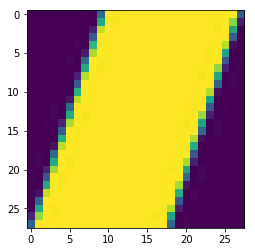

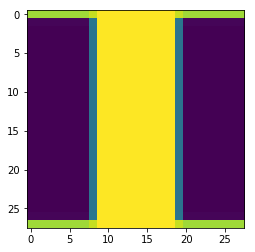

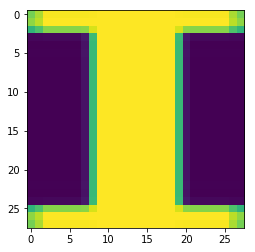

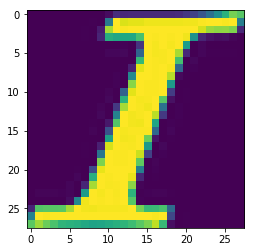

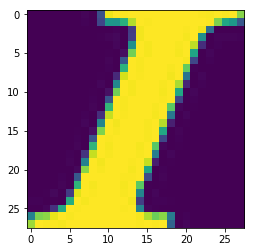

In [12]:
#define a function to conver label to letter
def letter(i):
    return 'abcdefghij'[i]

#some random number in range 0 - length of dataset
sample_idx = np.random.randint(0, len(train_datasets))
print(train_datasets[sample_idx])
dataset_name = train_datasets[sample_idx]
try:
    with open(dataset_name, 'rb') as ds:
        dataset = pickle.load(ds)
    for i in range(5):
        image = dataset[np.random.randint(0, len(dataset))]
        #print(image)
        plt.figure()
        plt.imshow(image, animated=True)
except Exception as e:
    print('Unable to read data from', dataset_name, ':', e)

#now we show it
#plt.imshow(train_datasets[sample_idx])
#plt.title("Char " + letter(train_labels[sample_idx]))

In [27]:
for i in range(len(train_datasets)):
    dataset_name = train_datasets[i]
    try:
        with open(dataset_name, 'rb') as ds:
            dataset = pickle.load(ds)
            print("%s %d" % (train_datasets[i], len(dataset)))
    except Exception as e:
        print('Unable to read data from', dataset_name, ':', e)
 

./notMNIST_large/A.pickle 52909
./notMNIST_large/B.pickle 52911
./notMNIST_large/C.pickle 52912
./notMNIST_large/D.pickle 52911
./notMNIST_large/E.pickle 52912
./notMNIST_large/F.pickle 52912
./notMNIST_large/G.pickle 52912
./notMNIST_large/H.pickle 52912
./notMNIST_large/I.pickle 52912
./notMNIST_large/J.pickle 52911


In [28]:
def make_arrays(nb_rows, img_size):
  if nb_rows:
    dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
    labels = np.ndarray(nb_rows, dtype=np.int32)
  else:
    dataset, labels = None, None
  return dataset, labels

def merge_datasets(pickle_files, train_size, valid_size=0):
  num_classes = len(pickle_files)
  valid_dataset, valid_labels = make_arrays(valid_size, image_size)
  train_dataset, train_labels = make_arrays(train_size, image_size)
  vsize_per_class = valid_size // num_classes
  tsize_per_class = train_size // num_classes
    
  start_v, start_t = 0, 0
  end_v, end_t = vsize_per_class, tsize_per_class
  end_l = vsize_per_class+tsize_per_class
  for label, pickle_file in enumerate(pickle_files):       
    try:
      with open(pickle_file, 'rb') as f:
        letter_set = pickle.load(f)
        # let's shuffle the letters to have random validation and training set
        np.random.shuffle(letter_set)
        if valid_dataset is not None:
          valid_letter = letter_set[:vsize_per_class, :, :]
          valid_dataset[start_v:end_v, :, :] = valid_letter
          valid_labels[start_v:end_v] = label
          start_v += vsize_per_class
          end_v += vsize_per_class
                    
        train_letter = letter_set[vsize_per_class:end_l, :, :]
        train_dataset[start_t:end_t, :, :] = train_letter
        train_labels[start_t:end_t] = label
        start_t += tsize_per_class
        end_t += tsize_per_class
    except Exception as e:
      print('Unable to process data from', pickle_file, ':', e)
      raise
    
  return valid_dataset, valid_labels, train_dataset, train_labels
            
            
train_size = 200000
valid_size = 10000
test_size = 10000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(
  train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

Training: (200000, 28, 28) (200000,)
Validation: (10000, 28, 28) (10000,)
Testing: (10000, 28, 28) (10000,)


In [29]:
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

In [30]:
for i in range(len(train_datasets)):
    dataset_name = train_datasets[i]
    try:
        with open(dataset_name, 'rb') as ds:
            dataset = pickle.load(ds)
            print("%s %d" % (train_datasets[i], len(dataset)))
    except Exception as e:
        print('Unable to read data from', dataset_name, ':', e)

./notMNIST_large/A.pickle 52909
./notMNIST_large/B.pickle 52911
./notMNIST_large/C.pickle 52912
./notMNIST_large/D.pickle 52911
./notMNIST_large/E.pickle 52912
./notMNIST_large/F.pickle 52912
./notMNIST_large/G.pickle 52912
./notMNIST_large/H.pickle 52912
./notMNIST_large/I.pickle 52912
./notMNIST_large/J.pickle 52911


./notMNIST_large/G.pickle


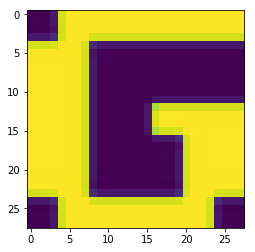

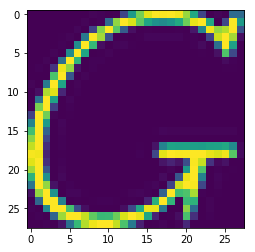

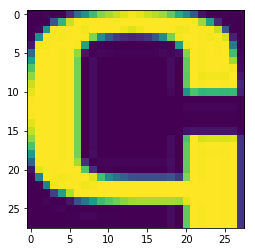

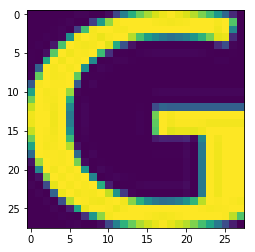

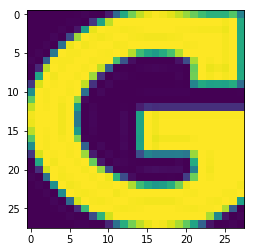

In [31]:
def letter(i):
    return 'abcdefghij'[i]

#some random number in range 0 - length of dataset
sample_idx = np.random.randint(0, len(train_datasets))
print(train_datasets[sample_idx])
dataset_name = train_datasets[sample_idx]
try:
    with open(dataset_name, 'rb') as ds:
        dataset = pickle.load(ds)
    for i in range(5):
        image = dataset[np.random.randint(0, len(dataset))]
        #print(image)
        plt.figure()
        plt.imshow(image, animated=True)
except Exception as e:
    print('Unable to read data from', dataset_name, ':', e)

In [32]:
pickle_file = os.path.join(data_root, 'notMNIST.pickle')

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

In [33]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 690800506


In [34]:
for i in range(len(train_datasets)):
    dataset_name = train_datasets[i]
    try:
        with open(dataset_name, 'rb') as ds:
            dataset = pickle.load(ds)
            print("%s %d %s" % (train_datasets[i], len(dataset), dataset[12]))
    except Exception as e:
        print('Unable to read data from', dataset_name, ':', e)

./notMNIST_large/A.pickle 52909 [[-0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.49992311 -0.49836987 -0.49921569 -0.5        -0.49998462 -0.5        -0.5       ]
 [-0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0.5        -0.49995387
  -0.5        -0.49864668 -0.49607843 -0.49752402 -0.5        -0.49995387
  -0.5        -0.5       ]
 [-0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0.49996924 -0.5
  -0.4994925  -0.49643216 -0.49607843 -0.49910805 -0.5        -0.49996924
  -0.5      

./notMNIST_large/C.pickle 52912 [[-0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5        -0.5        -0.49995387 -0.49998462 -0.5
  -0.49946174 -0.49770856 -0.49635524 -0.4989081  -0.5        -0.49995387
  -0.5        -0.5       ]
 [-0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.49998462 -0.49995387 -0.5        -0.49990773 -0.49824682
  -0.49644753 -0.49607843 -0.49607843 -0.49744713 -0.5        -0.5        -0.5
  -0.5       ]
 [-0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.49995387 -0.49996924 -0.5        -0.49916956 -0.49692425 -0.49607843
  -0.49610919 -0.4961707  -0.49607843 -0.49787775 -0.5        -0.49996924
  -0.5    

./notMNIST_large/E.pickle 52912 [[-0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0.49998462 -0.49998462
  -0.49995387 -0.49993849 -0.49998462 -0.5        -0.5        -0.5        -0.5
  -0.49980009 -0.49910805 -0.49827757 -0.49735487 -0.49621683 -0.49801615
  -0.5        -0.49996924]
 [-0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.49996924 -0.49993849 -0.49996924 -0.5        -0.5        -0.5
  -0.5        -0.49998462 -0.49966165 -0.49906191 -0.49813917 -0.4971242
  -0.49637061 -0.49607843 -0.49607843 -0.49650905 -0.49730873 -0.49916956
  -0.5        -0.49998462]
 [-0.5        -0.5        -0.5        -0.5        -0.49995387 -0.49995387
  -0.49996924 -0.49998462 -0.5        -0.5        -0.5        -0.49996924
  -0.49956939 -0.49873894 -0.49787775 -0.49700114 -0.49620146 -0.49607843
  -0.49607843 -0.49663207 -0.49758554 -0.49852365 -0.49929258 -0.49992311
  -0.5 

./notMNIST_large/G.pickle 52912 [[-0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0.49995387 -0.49996924
  -0.5        -0.5        -0.5        -0.49950787 -0.49832371 -0.49784699
  -0.49978471 -0.5       ]
 [-0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5        -0.49996924 -0.49998462 -0.49998462 -0.5
  -0.4994925  -0.4980469  -0.49666283 -0.49627835 -0.49677047 -0.49784699
  -0.49975395 -0.5       ]
 [-0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.49996924 -0.49996924 -0.49998462 -0.5        -0.49893886 -0.49707806
  -0.49607843 -0.49629372 -0.49772397 -0.49920031 -0.49993849 -0.5        -0.

./notMNIST_large/I.pickle 52912 [[-0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0.5        -0.49998462
  -0.49998462 -0.4998616  -0.4986313  -0.49840063 -0.49869281 -0.49938485
  -0.49976933 -0.5       ]
 [-0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.49941561 -0.49835446 -0.49660131 -0.49607843 -0.49623221 -0.49724722
  -0.49869281 -0.5       ]
 [-0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0.5        -0.5        -0.5
  -0.5        -0.5        -0.5        -0.5        -0.49996924 -0.49956939
  -0.49810842 -0.49618608 -0.49612457 -0.49610919 -0.49615532 -0.49646291
  -